In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("../data/preselection_meme_ratings.csv")

# Remove duplicate entries based on prolific_id, keeping only the first occurrence
df = df.drop_duplicates(subset="prolific_id", keep="first")

# Identify columns to drop: 'prolific_id' and any column with 'feedback' in its name
cols_to_drop = ['prolific_id'] + [col for col in df.columns if "feedback" in col]

# Create a new DataFrame by dropping the identified columns
df_filtered = df.drop(columns=cols_to_drop)

# Print the number of rows in the filtered DataFrame
print(f"Number of rows: {df_filtered.shape[0]}")

# Display the first few rows of the filtered DataFrame
df_filtered.head()

Number of rows: 110


,claim1_meme1,claim1_meme2,claim1_meme3,claim1_meme4,claim1_meme5,claim1_meme6,claim1_meme7,claim1_meme8,claim1_pref_meme,claim2_meme1,...,claim11_pref_meme,claim12_meme1,claim12_meme2,claim12_meme3,claim12_meme4,claim12_meme5,claim12_meme6,claim12_meme7,claim12_meme8,claim12_pref_meme
0,3,3,3,3,3,3,3,3,Meme 8,3,...,Meme 6,3,3,3,3,3,3,3,3,Meme 4
1,3,4,5,3,4,3,4,3,Meme 3,4,...,Meme 4,5,4,4,4,5,4,4,5,Meme 1
2,5,3,4,2,2,4,2,4,Meme 1,2,...,Meme 8,4,4,3,2,2,2,2,5,Meme 8
3,4,1,1,2,1,1,1,4,Meme 1,2,...,Meme 8,1,1,1,1,1,1,1,2,NaN
4,4,2,2,1,1,1,2,1,Meme 1,1,...,Meme 8,1,1,1,2,1,1,1,4,Meme 8


# Prefered Meme Distribution

Preferred Memes Distribution Statistics:
                   count  percentage
humans               426   32.272727
None                 211   15.984848
gemini 1.5 pro       144   10.909091
claude 3.5 sonnet    140   10.606061
pixtral large        100    7.575758
qwen-2                97    7.348485
gpt-4o                81    6.136364
llama-3.2             75    5.681818
qwq                   46    3.484848
Percentage of 'None' responses: 15.98%
Bar graph saved as: ../results/preselection_data/preferred_memes_distribution_20250403_170548.png


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_70430/2193094732.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pref_series = df_filtered[pref_columns].stack(dropna=False).fillna("None")


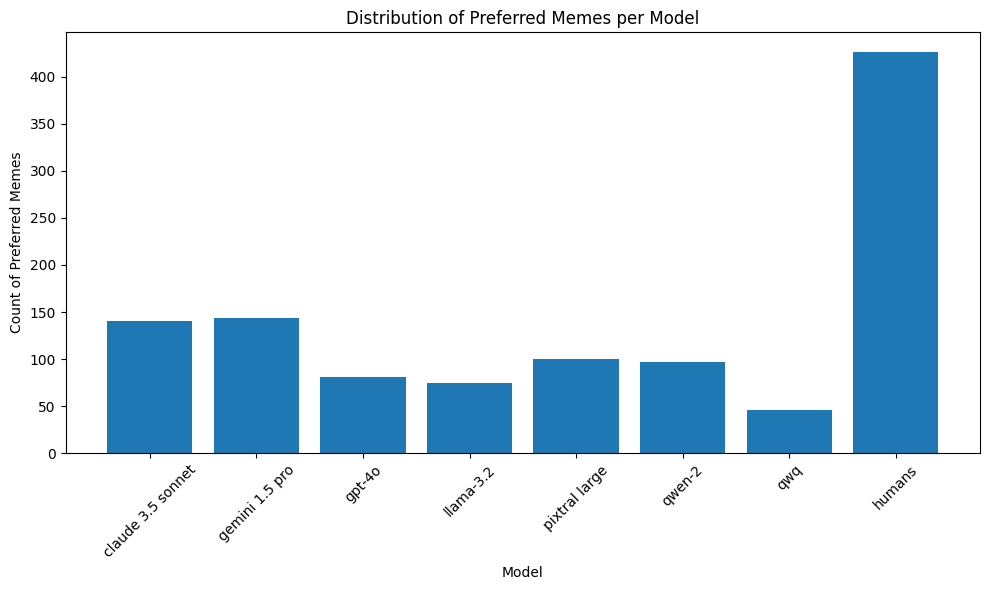

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Use the df_filtered DataFrame from the previous cell

# Select columns for preferred memes (columns ending with "_pref_meme")
pref_columns = [col for col in df_filtered.columns if col.endswith("_pref_meme")]

# Stack these columns into one Series, ensuring missing values are preserved, then fill with "None"
pref_series = df_filtered[pref_columns].stack(dropna=False).fillna("None")

# Define the mapping of meme labels to model names
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Map the preferred meme responses; if a value is not found in the mapping (e.g., "None"), it remains unchanged
pref_series_mapped = pref_series.map(lambda x: model_mapping.get(x, x))

# Compute the counts and percentage distribution
model_counts = pref_series_mapped.value_counts()
total = model_counts.sum()
model_stats = model_counts.to_frame("count")
model_stats["percentage"] = (model_stats["count"] / total) * 100

# Print textual statistics for all responses
print("Preferred Memes Distribution Statistics:")
print(model_stats)

# Specifically print the percentage of "None" responses
none_count = model_counts.get("None", 0)
none_percentage = (none_count / total) * 100
print(f"Percentage of 'None' responses: {none_percentage:.2f}%")

# Define the order for the bar plot (excluding "None")
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", "pixtral large", "qwen-2", "qwq", "humans"]
model_counts_ordered = model_counts.reindex(order).fillna(0)

plt.figure(figsize=(10, 6))
plt.bar(model_counts_ordered.index, model_counts_ordered.values)
plt.xlabel("Model")
plt.ylabel("Count of Preferred Memes")
plt.title("Distribution of Preferred Memes per Model")
plt.xticks(rotation=45)
plt.tight_layout()

# Create a timestamp for file naming
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the plot to the plots directory with the timestamp in the filename
plot_filename = f"../results/preselection_data/preferred_memes_distribution_{timestamp}.png"
plt.savefig(plot_filename)
print(f"Bar graph saved as: {plot_filename}")

plt.show()


# Preferred memes distribution per claim
## The inter-rater agreements overall and per claim were very low...

In [10]:
import pandas as pd
import numpy as np

# --- Preprocess the Preferred Meme Ratings from df_filtered ---
# Select columns ending with "_pref_meme"
pref_columns = [col for col in df_filtered.columns if col.endswith("_pref_meme")]
pref_df = df_filtered[pref_columns].copy()

# Define the mapping from "Meme X" to model names
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Map the responses using the model mapping; values not in mapping (e.g., "None") remain unchanged.
pref_df = pref_df.applymap(lambda x: model_mapping.get(x, x))
# Replace any missing values with "None"
pref_df = pref_df.fillna("None")

# --- Print the Distribution Counts and Percentages per Claim ---
print("Distributions of Preferred Memes Per Claim (including 'None'):\n")
for col in pref_columns:
    print(f"{col}:")
    total = pref_df[col].shape[0]
    distribution = pref_df[col].value_counts().sort_index()
    for response, count in distribution.items():
        percentage = (count / total) * 100
        print(f"  {response}: {count} ({percentage:.2f}%)")
    print()

Distributions of Preferred Memes Per Claim (including 'None'):

claim1_pref_meme:
  None: 5 (4.55%)
  claude 3.5 sonnet: 50 (45.45%)
  gemini 1.5 pro: 4 (3.64%)
  gpt-4o: 10 (9.09%)
  humans: 23 (20.91%)
  llama-3.2: 6 (5.45%)
  pixtral large: 3 (2.73%)
  qwen-2: 7 (6.36%)
  qwq: 2 (1.82%)

claim2_pref_meme:
  None: 13 (11.82%)
  claude 3.5 sonnet: 6 (5.45%)
  gemini 1.5 pro: 20 (18.18%)
  gpt-4o: 5 (4.55%)
  humans: 36 (32.73%)
  llama-3.2: 9 (8.18%)
  pixtral large: 9 (8.18%)
  qwen-2: 6 (5.45%)
  qwq: 6 (5.45%)

claim3_pref_meme:
  None: 13 (11.82%)
  claude 3.5 sonnet: 2 (1.82%)
  gemini 1.5 pro: 20 (18.18%)
  gpt-4o: 1 (0.91%)
  humans: 42 (38.18%)
  llama-3.2: 12 (10.91%)
  pixtral large: 18 (16.36%)
  qwen-2: 1 (0.91%)
  qwq: 1 (0.91%)

claim4_pref_meme:
  None: 19 (17.27%)
  claude 3.5 sonnet: 6 (5.45%)
  gemini 1.5 pro: 11 (10.00%)
  gpt-4o: 2 (1.82%)
  humans: 49 (44.55%)
  llama-3.2: 2 (1.82%)
  pixtral large: 6 (5.45%)
  qwen-2: 9 (8.18%)
  qwq: 6 (5.45%)

claim5_pref_meme:

/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_71366/1632602968.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pref_df = pref_df.applymap(lambda x: model_mapping.get(x, x))


# Meme's effectiveness per model

Plot saved as: ../results/preselection_data/average_meme_ratings_20250409_145243.png


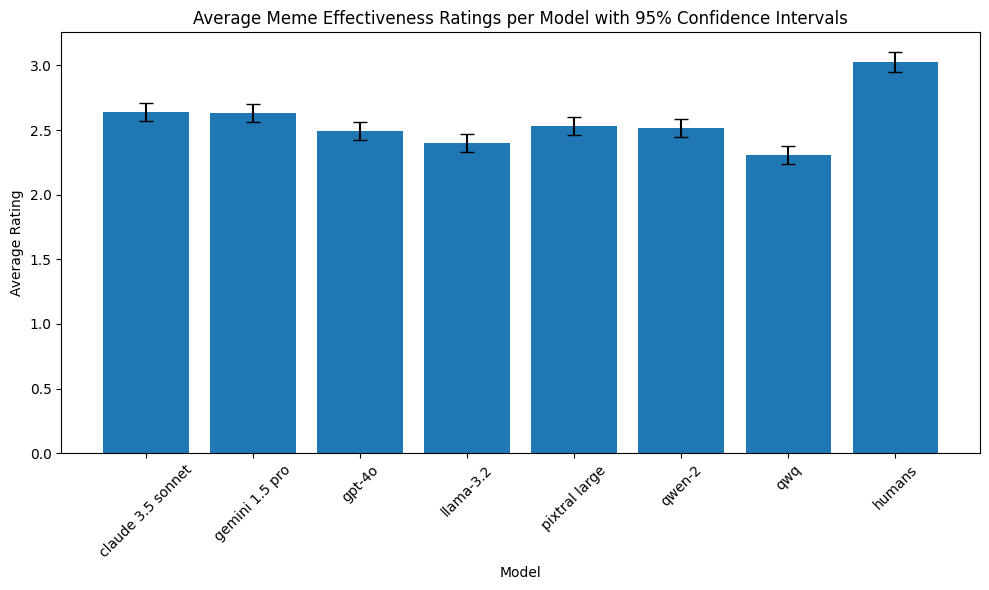

Model Average Ratings with 95% Confidence Intervals:
claude 3.5 sonnet: Mean = 2.64, n = 1320, 95% CI = (2.57, 2.71)
gemini 1.5 pro: Mean = 2.63, n = 1320, 95% CI = (2.56, 2.70)
gpt-4o: Mean = 2.49, n = 1320, 95% CI = (2.42, 2.56)
llama-3.2: Mean = 2.40, n = 1320, 95% CI = (2.33, 2.47)
pixtral large: Mean = 2.53, n = 1320, 95% CI = (2.46, 2.60)
qwen-2: Mean = 2.52, n = 1320, 95% CI = (2.45, 2.59)
qwq: Mean = 2.31, n = 1320, 95% CI = (2.24, 2.37)
humans: Mean = 3.03, n = 1320, 95% CI = (2.95, 3.10)


In [36]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# --- Extract Generated Meme Ratings from df_filtered ---
# Filter columns that match the pattern "claimX_memeY"
generated_cols = [col for col in df_filtered.columns if re.match(r"claim\d+_meme\d+$", col)]

# Define the mapping from "Meme X" to model names
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Initialize a dictionary to collect ratings for each model
model_ratings = {model: [] for model in model_mapping.values()}

# Loop through each generated meme rating column
for col in generated_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1")
    meme_identifier = col.split('_')[-1]  # e.g., "meme1"
    if meme_identifier.startswith("meme"):
        # Extract the number and build the key "Meme 1"
        meme_num = meme_identifier.replace("meme", "")
        key = "Meme " + meme_num
        model_name = model_mapping.get(key, None)
        if model_name:
            # Convert the column to numeric ratings, drop any missing values, and extend the list
            ratings = pd.to_numeric(df_filtered[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute Average Ratings and 95% Confidence Intervals ---
model_stats = {}
z = 1.96  # z-score for a 95% confidence interval
for model, ratings in model_ratings.items():
    if len(ratings) > 0:
        mean_rating = np.mean(ratings)
        std_rating = np.std(ratings, ddof=1)
        n = len(ratings)
        se = std_rating / np.sqrt(n)
        ci_lower = mean_rating - z * se
        ci_upper = mean_rating + z * se
        model_stats[model] = {
            "mean": mean_rating,
            "n": n,
            "std": std_rating,
            "se": se,
            "ci_lower": ci_lower,
            "ci_upper": ci_upper
        }
    else:
        model_stats[model] = {
            "mean": np.nan,
            "n": 0,
            "std": np.nan,
            "se": np.nan,
            "ci_lower": np.nan,
            "ci_upper": np.nan
        }

# Define the order for plotting
order = ["claude 3.5 sonnet", "gemini 1.5 pro", "gpt-4o", "llama-3.2", 
         "pixtral large", "qwen-2", "qwq", "humans"]

# Gather means and error bars (difference between mean and upper CI, assumed symmetric)
means = [model_stats[model]["mean"] for model in order]
error_bars = [(model_stats[model]["ci_upper"] - model_stats[model]["mean"]) for model in order]

# --- Plot the Bar Graph with Confidence Intervals ---
plt.figure(figsize=(10, 6))
plt.bar(order, means, yerr=error_bars, capsize=5)
plt.xlabel("Model")
plt.ylabel("Average Rating")
plt.title("Average Meme Effectiveness Ratings per Model with 95% Confidence Intervals")
plt.xticks(rotation=45)
plt.tight_layout()

# Create a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_filename = f"../results/preselection_data/average_meme_ratings_{timestamp}.png"
plt.savefig(plot_filename)
print(f"Plot saved as: {plot_filename}")
plt.show()

# --- Print the Average Ratings and Confidence Intervals ---
print("Model Average Ratings with 95% Confidence Intervals:")
for model in order:
    stats = model_stats[model]
    print(f"{model}: Mean = {stats['mean']:.2f}, n = {stats['n']}, 95% CI = ({stats['ci_lower']:.2f}, {stats['ci_upper']:.2f})")

# Meme's effectiveness per claim

In [15]:
import re
import pandas as pd
import numpy as np

# Define the mapping from "Meme X" to model names (not used directly here but kept for clarity)
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Extract generated meme rating columns (e.g. "claim1_meme1", "claim1_meme2", etc.)
generated_cols = [col for col in df_filtered.columns if re.match(r"claim\d+_meme\d+$", col)]

# Extract unique claim identifiers (e.g., "claim1", "claim2", ...)
claims = sorted(
    {re.match(r"(claim\d+)_meme\d+", col).group(1) for col in generated_cols},
    key=lambda x: int(re.search(r'\d+', x).group())
)

print("Average of Average Meme Effectiveness Ratings per Claim (across all models):\n")
# Loop over each claim
for claim in claims:
    model_avgs = []  # to store each model's average for the current claim
    # For each model number (from 1 to 8)
    for meme_num in range(1, 9):
        col_name = f"{claim}_meme{meme_num}"
        if col_name in df_filtered.columns:
            # Convert ratings to numeric, drop missing/non-numeric values, and compute average
            ratings = pd.to_numeric(df_filtered[col_name], errors='coerce').dropna()
            if not ratings.empty:
                model_avg = ratings.mean()
                model_avgs.append(model_avg)
    # Compute the average of model averages for the claim
    if model_avgs:
        overall_claim_avg = np.mean(model_avgs)
        print(f"{claim}: {overall_claim_avg:.2f}")
    else:
        print(f"{claim}: No data available")

Average of Average Meme Effectiveness Ratings per Claim (across all models):

claim1: 2.96
claim2: 2.62
claim3: 2.58
claim4: 2.62
claim5: 2.50
claim6: 2.71
claim7: 2.50
claim8: 2.64
claim9: 2.52
claim10: 2.39
claim11: 2.42
claim12: 2.35


# Stat significance preferred memes

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# --- Extract Preferred Meme Data ---
# Select columns ending with "_pref_meme"
pref_columns = [col for col in df_filtered.columns if col.endswith("_pref_meme")]

# Stack all preferred meme responses into one Series and fill missing values with "None"
pref_series = df_filtered[pref_columns].stack(dropna=False).fillna("None")

# Define mapping from "Meme X" to model names
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Map responses using the mapping; if a response isn't in the mapping (e.g. "None"), leave it unchanged.
pref_series_mapped = pref_series.map(lambda x: model_mapping.get(x, x))

# --- Compute and Print Counts and Percentages ---
pref_counts = pref_series_mapped.value_counts().sort_index()
total = pref_series_mapped.shape[0]

print("Overall Preferred Memes Distribution (Counts and Percentages):\n")
for response, count in pref_counts.items():
    percentage = (count / total) * 100
    print(f"{response}: {count} ({percentage:.2f}%)")
print()

# --- Chi-square Goodness-of-Fit Test ---
# Null hypothesis: responses are uniformly distributed across categories.
observed = pref_counts.values

# Construct expected frequencies with np.repeat to ensure the sum exactly matches observed.sum()
expected = np.repeat(observed.sum() / len(observed), len(observed))

# (Optional) Check that the sums match exactly:
print("Sum of observed frequencies:", observed.sum())
print("Sum of expected frequencies:", expected.sum())

chi2_stat, chi2_p = stats.chisquare(f_obs=observed, f_exp=expected)
print("\nChi-square Test for Preferred Memes Distribution:")
print(f"  Chi2 statistic = {chi2_stat:.3f}")
print(f"  p-value = {chi2_p:.3f}")

Overall Preferred Memes Distribution (Counts and Percentages):

None: 211 (15.98%)
claude 3.5 sonnet: 140 (10.61%)
gemini 1.5 pro: 144 (10.91%)
gpt-4o: 81 (6.14%)
humans: 426 (32.27%)
llama-3.2: 75 (5.68%)
pixtral large: 100 (7.58%)
qwen-2: 97 (7.35%)
qwq: 46 (3.48%)

Sum of observed frequencies: 1320
Sum of expected frequencies: 1320.0

Chi-square Test for Preferred Memes Distribution:
  Chi2 statistic = 725.755
  p-value = 0.000


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_71366/3558882339.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pref_series = df_filtered[pref_columns].stack(dropna=False).fillna("None")


# Stat significance meme's effectiveness per model

In [19]:
import re
import pandas as pd
import numpy as np
import scipy.stats as stats

# --- Extract Generated Meme Effectiveness Ratings ---
# Select columns matching the pattern "claimX_memeY"
generated_cols = [col for col in df_filtered.columns if re.match(r"claim\d+_meme\d+$", col)]

# Define the mapping from "Meme X" to model names
model_mapping = {
    "Meme 1": "claude 3.5 sonnet",
    "Meme 2": "gemini 1.5 pro",
    "Meme 3": "gpt-4o",
    "Meme 4": "llama-3.2",
    "Meme 5": "pixtral large",
    "Meme 6": "qwen-2",
    "Meme 7": "qwq",
    "Meme 8": "humans"
}

# Initialize a dictionary to collect ratings per model
model_ratings = {model: [] for model in model_mapping.values()}

# Loop through each generated meme rating column
for col in generated_cols:
    # Extract the meme identifier (e.g., "meme1" from "claim1_meme1")
    meme_identifier = col.split('_')[-1]  # e.g., "meme1"
    if meme_identifier.startswith("meme"):
        meme_num = meme_identifier.replace("meme", "")
        key = "Meme " + meme_num
        model_name = model_mapping.get(key, None)
        if model_name:
            # Convert ratings to numeric, drop missing values, and add to the model's list
            ratings = pd.to_numeric(df_filtered[col], errors='coerce').dropna().tolist()
            model_ratings[model_name].extend(ratings)

# --- Compute and Print Summary Statistics per Model ---
print("Summary Statistics for Meme Effectiveness Ratings per Model:\n")
model_stats = {}
for model, ratings in model_ratings.items():
    if len(ratings) > 0:
        n = len(ratings)
        mean_val = np.mean(ratings)
        std_val = np.std(ratings, ddof=1)
        se = std_val / np.sqrt(n)
        model_stats[model] = {"n": n, "mean": mean_val, "std": std_val, "se": se}
        print(f"{model}: n = {n}, mean = {mean_val:.2f}, std = {std_val:.2f}, se = {se:.2f}")
    else:
        model_stats[model] = {"n": 0, "mean": np.nan, "std": np.nan, "se": np.nan}
        print(f"{model}: No data available")
print()

# --- Statistical Test: Kruskal-Wallis ---
# Prepare groups for the Kruskal-Wallis test (only including models with data)
groups = [ratings for ratings in model_ratings.values() if len(ratings) > 0]

kruskal_stat, kruskal_p = stats.kruskal(*groups)
print("Kruskal-Wallis Test for Meme Effectiveness Ratings Across Models:")
print(f"  H-statistic = {kruskal_stat:.3f}")
print(f"  p-value = {kruskal_p:.3f}")

Summary Statistics for Meme Effectiveness Ratings per Model:

claude 3.5 sonnet: n = 1320, mean = 2.64, std = 1.32, se = 0.04
gemini 1.5 pro: n = 1320, mean = 2.63, std = 1.31, se = 0.04
gpt-4o: n = 1320, mean = 2.49, std = 1.28, se = 0.04
llama-3.2: n = 1320, mean = 2.40, std = 1.25, se = 0.03
pixtral large: n = 1320, mean = 2.53, std = 1.29, se = 0.04
qwen-2: n = 1320, mean = 2.52, std = 1.28, se = 0.04
qwq: n = 1320, mean = 2.31, std = 1.25, se = 0.03
humans: n = 1320, mean = 3.03, std = 1.39, se = 0.04

Kruskal-Wallis Test for Meme Effectiveness Ratings Across Models:
  H-statistic = 232.288
  p-value = 0.000


# Stat significance democrat vs republican claims effectiveness

In [20]:
import re
import pandas as pd
import numpy as np
import scipy.stats as stats

# --- Define Political Orientation for Each Claim ---
claim_political = {
    "claim1": "pro democrat",
    "claim2": "pro republican",
    "claim3": "pro democrat",
    "claim4": "pro republican",
    "claim5": "pro democrat",
    "claim6": "pro republican",
    "claim7": "pro democrat",
    "claim8": "pro republican",
    "claim9": "pro democrat",
    "claim10": "pro republican",
    "claim11": "pro democrat",
    "claim12": "pro republican"
}

# --- Compute Overall Effectiveness for Each Claim ---
# We assume that generated meme effectiveness ratings are in columns matching "claimX_memeY"
generated_cols = [col for col in df_filtered.columns if re.match(r"claim\d+_meme\d+$", col)]
# Extract unique claim identifiers (e.g., "claim1", "claim2", ...)
claims = sorted(
    {re.match(r"(claim\d+)_meme\d+", col).group(1) for col in generated_cols},
    key=lambda x: int(re.search(r'\d+', x).group())
)

# For each claim, compute the average of the 8 models' average ratings.
# That is, for each claim we compute each model's average rating and then average them.
claim_effectiveness = {}
for claim in claims:
    model_avgs = []
    for meme_num in range(1, 9):
        col_name = f"{claim}_meme{meme_num}"
        if col_name in df_filtered.columns:
            # Convert ratings to numeric and drop non-numeric values
            ratings = pd.to_numeric(df_filtered[col_name], errors='coerce').dropna()
            if not ratings.empty:
                model_avg = ratings.mean()
                model_avgs.append(model_avg)
    if model_avgs:
        overall_claim_avg = np.mean(model_avgs)
        claim_effectiveness[claim] = overall_claim_avg

# --- Separate Claim Averages by Political Orientation ---
democrat_avgs = []
republican_avgs = []

for claim, avg in claim_effectiveness.items():
    if claim in claim_political:
        if claim_political[claim] == "pro democrat":
            democrat_avgs.append(avg)
        elif claim_political[claim] == "pro republican":
            republican_avgs.append(avg)

print("Average Meme Effectiveness Ratings per Claim:")
print("Pro Democrat Claims Averages:", democrat_avgs)
print("Pro Republican Claims Averages:", republican_avgs)
print()

# --- Summary Statistics ---
dem_mean = np.mean(democrat_avgs)
dem_std = np.std(democrat_avgs, ddof=1)
rep_mean = np.mean(republican_avgs)
rep_std = np.std(republican_avgs, ddof=1)

print("Summary Statistics:")
print(f"Pro Democrat Claims: n = {len(democrat_avgs)}, mean = {dem_mean:.2f}, std = {dem_std:.2f}")
print(f"Pro Republican Claims: n = {len(republican_avgs)}, mean = {rep_mean:.2f}, std = {rep_std:.2f}")
print()

# --- Mann-Whitney U Test ---
# Use Mann-Whitney U test as a nonparametric alternative for small sample sizes.
u_stat, p_value = stats.mannwhitneyu(democrat_avgs, republican_avgs, alternative='two-sided')
print("Mann-Whitney U Test for Effectiveness Ratings between Pro Democrat and Pro Republican Claims:")
print(f"  U statistic = {u_stat:.3f}")
print(f"  p-value = {p_value:.3f}")

Average Meme Effectiveness Ratings per Claim:
Pro Democrat Claims Averages: [2.959090909090909, 2.584090909090909, 2.504545454545455, 2.5011363636363635, 2.518181818181818, 2.422727272727273]
Pro Republican Claims Averages: [2.620454545454545, 2.618181818181818, 2.709090909090909, 2.640909090909091, 2.3863636363636362, 2.3545454545454545]

Summary Statistics:
Pro Democrat Claims: n = 6, mean = 2.58, std = 0.19
Pro Republican Claims: n = 6, mean = 2.55, std = 0.15

Mann-Whitney U Test for Effectiveness Ratings between Pro Democrat and Pro Republican Claims:
  U statistic = 16.000
  p-value = 0.818


# Corr meme's effectiveness and age_group

In [21]:
import pandas as pd
import numpy as np
import re
from scipy.stats import spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
ratings = pd.read_csv("../data/preselection_meme_ratings.csv")

# Merge the datasets on prolific_id
merged = pd.merge(demographics, ratings, on="prolific_id", how="inner")

# --- Filter out rows where age_group is "I prefer not to answer" ---
merged = merged[merged["age_group"] != "I prefer not to answer"]

# --- Manual Age Group Conversion ---
# Map the age_group strings to numeric codes
age_mapping = {
    "18-25 years old": 1,
    "26-35 years old": 2,
    "36-50 years old": 3,
    "Over 50 years old": 4
}
merged["age_group_numeric"] = merged["age_group"].map(age_mapping)

# --- Compute Participant Meme Effectiveness ---
# Identify columns that match the pattern "claimX_memeY" (generated meme ratings)
rating_cols = [col for col in merged.columns if re.match(r"claim\d+_meme\d+$", col)]

# For each participant, compute the average effectiveness rating across these columns.
merged["avg_effectiveness"] = merged[rating_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Spearman Correlation ---
corr, p_val = spearmanr(merged["avg_effectiveness"], merged["age_group_numeric"], nan_policy='omit')

print("Correlation between Meme Effectiveness Ratings and Participant Age Group:")
print(f"Spearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}")

Correlation between Meme Effectiveness Ratings and Participant Age Group:
Spearman correlation coefficient: -0.100
p-value: 0.298


# Corr meme's effectiveness and political orientation

In [23]:
import pandas as pd
import numpy as np
import re
from scipy.stats import spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
ratings = pd.read_csv("../data/preselection_meme_ratings.csv")

# Merge on prolific_id
merged = pd.merge(demographics, ratings, on="prolific_id", how="inner")

# --- Filter Out 'I prefer not to answer' for Political Orientation ---
merged = merged[merged["political_orientation"] != "I prefer not to answer"]

# --- Manual Political Orientation Conversion ---
# Mapping: Very Conservative → 1, Moderately Conservative → 2, Moderate → 3,
# Moderately Liberal → 4, Very Liberal → 5
pol_mapping = {
    "1 (Very Conservative)": 1,
    "2 (Moderately Conservative)": 2,
    "3 (Moderate)": 3,
    "4 (Moderately Liberal)": 4,
    "5 (Very Liberal)": 5
}
merged["political_orientation_numeric"] = merged["political_orientation"].map(pol_mapping)

# --- Compute Participant Meme Effectiveness ---
# Identify columns that match the pattern "claimX_memeY" (generated meme ratings)
rating_cols = [col for col in merged.columns if re.match(r"claim\d+_meme\d+$", col)]

# Compute the average effectiveness rating across these columns for each participant.
merged["avg_effectiveness"] = merged[rating_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Spearman Correlation ---
# Using Spearman correlation as political_orientation is ordinal.
corr, p_val = spearmanr(merged["avg_effectiveness"], merged["political_orientation_numeric"], nan_policy='omit')

print("Correlation between Meme Effectiveness Ratings and Political Orientation:")
print(f"Spearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}")

Correlation between Meme Effectiveness Ratings and Political Orientation:
Spearman correlation coefficient: -0.137
p-value: 0.160


# Corr meme's effectiveness and meme familiarity

In [25]:
import pandas as pd
import numpy as np
import re
from scipy.stats import spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
ratings = pd.read_csv("../data/preselection_meme_ratings.csv")

# Merge on prolific_id
merged = pd.merge(demographics, ratings, on="prolific_id", how="inner")

# --- Filter Out Rows where meme_familiarity is "I prefer not to answer" ---
merged = merged[merged["meme_familiarity"] != "I prefer not to answer"]

# --- Manual Meme Familiarity Conversion ---
familiarity_mapping = {
    "Not familiar at all": 1,
    "Slightly familiar": 2,
    "Moderately familiar": 3,
    "Very familiar": 4,
    "Extremely familiar": 5
}
merged["meme_familiarity_numeric"] = merged["meme_familiarity"].map(familiarity_mapping)

# --- Compute Participant Meme Effectiveness ---
# Identify columns that match the pattern "claimX_memeY" (generated meme ratings)
rating_cols = [col for col in merged.columns if re.match(r"claim\d+_meme\d+$", col)]
# For each participant, compute the average effectiveness rating across these columns
merged["avg_effectiveness"] = merged[rating_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Spearman Correlation ---
corr, p_val = spearmanr(merged["avg_effectiveness"], merged["meme_familiarity_numeric"], nan_policy='omit')

print("Correlation between Meme Effectiveness Ratings and Meme Familiarity:")
print(f"Spearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}")

Correlation between Meme Effectiveness Ratings and Meme Familiarity:
Spearman correlation coefficient: 0.071
p-value: 0.462


# Meme's effectiveness and level of education

In [27]:
import pandas as pd
import numpy as np
import re
from scipy.stats import spearmanr

# --- Load the Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
ratings = pd.read_csv("../data/preselection_meme_ratings.csv")

# Merge datasets on prolific_id
merged = pd.merge(demographics, ratings, on="prolific_id", how="inner")

# --- Filter out rows where education_level is "I prefer not to answer" ---
merged = merged[merged["education_level"] != "I prefer not to answer"]

# --- Manual Education Level Conversion ---
# Mapping: Elementary education → 1, High school diploma or equivalent → 2, 
# Bachelor's degree → 3, Master's degree → 4, Doctoral degree (PhD) → 5
education_mapping = {
    "Elementary education": 1,
    "High school diploma or equivalent": 2,
    "Bachelor's degree": 3,
    "Master's degree": 4,
    "Doctoral degree (PhD)": 5
}
merged["education_level_numeric"] = merged["education_level"].map(education_mapping)

# --- Compute Participant Meme Effectiveness ---
# Identify all columns matching the pattern "claimX_memeY" (generated meme ratings)
rating_cols = [col for col in merged.columns if re.match(r"claim\d+_meme\d+$", col)]
# For each participant, compute the average effectiveness rating across these columns.
merged["avg_effectiveness"] = merged[rating_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Overall Spearman Correlation ---
corr, p_val = spearmanr(merged["avg_effectiveness"], merged["education_level_numeric"], nan_policy='omit')
print("Correlation between Meme Effectiveness Ratings and Education Level:")
print(f"Spearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}")
print()

# --- Detailed Statistics by Education Level ---
# Group by the original education_level text (so you can see the category names)
grouped = merged.groupby("education_level").agg(
    n=("avg_effectiveness", "count"),
    mean_effectiveness=("avg_effectiveness", "mean"),
    std_effectiveness=("avg_effectiveness", "std")
).reset_index()

# Compute Standard Error and 95% Confidence Intervals for each category
grouped["se"] = grouped["std_effectiveness"] / np.sqrt(grouped["n"])
z = 1.96  # z-score for a 95% CI
grouped["ci_lower"] = grouped["mean_effectiveness"] - z * grouped["se"]
grouped["ci_upper"] = grouped["mean_effectiveness"] + z * grouped["se"]

print("Detailed Statistics by Education Level:")
print(grouped)

Correlation between Meme Effectiveness Ratings and Education Level:
Spearman correlation coefficient: 0.283
p-value: 0.003

Detailed Statistics by Education Level:
                     education_level   n  mean_effectiveness  \
0                  Bachelor's degree  44            2.792377   
1              Doctoral degree (PhD)   4            2.549479   
2  High school diploma or equivalent  47            2.265957   
3                    Master's degree  15            2.863194   

   std_effectiveness        se  ci_lower  ci_upper  
0           0.812601  0.122504  2.552269  3.032485  
1           0.815183  0.407592  1.750600  3.348359  
2           0.784398  0.114416  2.041702  2.490213  
3           0.872844  0.225367  2.421475  3.304914  


# Correlation between political orientation groups and claim's position meme ratings

In [33]:
import pandas as pd
import numpy as np
import re
from scipy.stats import spearmanr

# --- Load and Merge Data ---
demographics = pd.read_csv("../data/participant_demographics.csv")
ratings = pd.read_csv("../data/preselection_meme_ratings.csv")
merged = pd.merge(demographics, ratings, on="prolific_id", how="inner")

# --- Filter Out "I prefer not to answer" for Political Orientation ---
merged = merged[merged["political_orientation"] != "I prefer not to answer"]

# --- Recode Political Orientation ---
# Recode into three groups:
#   Very/Moderately Liberal -> "Liberal"
#   Moderate -> "Moderate"
#   Very/Moderately Conservative -> "Conservative"
def recode_pol(orientation):
    if orientation in ["5 (Very Liberal)", "4 (Moderately Liberal)"]:
        return "Liberal"
    elif orientation == "3 (Moderate)":
        return "Moderate"
    elif orientation in ["2 (Moderately Conservative)", "1 (Very Conservative)"]:
        return "Conservative"
    else:
        return np.nan

merged["political_orientation_recoded"] = merged["political_orientation"].apply(recode_pol)

# Map recoded values to numeric according to the left-to-right spectrum (Liberal=1, Moderate=2, Conservative=3)
pol_numeric_mapping = {"Liberal": 1, "Moderate": 2, "Conservative": 3}
merged["political_orientation_numeric"] = merged["political_orientation_recoded"].map(pol_numeric_mapping)

# --- Define Claim Political Orientation ---
# For each claim, whether it's pro democrat or pro republican:
claim_political = {
    "claim1": "pro democrat",
    "claim2": "pro republican",
    "claim3": "pro democrat",
    "claim4": "pro republican",
    "claim5": "pro democrat",
    "claim6": "pro republican",
    "claim7": "pro democrat",
    "claim8": "pro republican",
    "claim9": "pro democrat",
    "claim10": "pro republican",
    "claim11": "pro democrat",
    "claim12": "pro republican"
}

# --- Compute Average Effectiveness Ratings per Claim ---
# Identify generated meme rating columns matching the pattern "claimX_memeY"
generated_cols = [col for col in merged.columns if re.match(r"claim\d+_meme\d+$", col)]

# Extract unique claim identifiers (e.g., "claim1", "claim2", …)
claims = sorted(
    {re.match(r"(claim\d+)_meme\d+", col).group(1) for col in generated_cols},
    key=lambda x: int(re.search(r'\d+', x).group())
)

# For each claim, compute the row-wise average rating (across the 8 meme columns for that claim)
for claim in claims:
    claim_cols = [col for col in generated_cols if col.startswith(claim)]
    merged[f"avg_{claim}"] = merged[claim_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# --- Compute Participant-Level Averages for Each Claim Type ---
# Separate claims by political orientation of the claim:
democrat_claims = [claim for claim in claims if claim_political.get(claim) == "pro democrat"]
republican_claims = [claim for claim in claims if claim_political.get(claim) == "pro republican"]

# Average effectiveness across the pro-democrat claims and pro-republican claims, per participant
merged["avg_effectiveness_dem"] = merged[[f"avg_{claim}" for claim in democrat_claims]].mean(axis=1)
merged["avg_effectiveness_rep"] = merged[[f"avg_{claim}" for claim in republican_claims]].mean(axis=1)

# Compute the difference: (pro republican - pro democrat)
merged["effectiveness_diff"] = merged["avg_effectiveness_rep"] - merged["avg_effectiveness_dem"]

# --- Correlate the Difference with Political Orientation ---
corr, p_val = spearmanr(merged["effectiveness_diff"], merged["political_orientation_numeric"], nan_policy='omit')
print("Correlation between (Pro Republican - Pro Democrat) Effectiveness Difference and Political Orientation:")
print(f"Spearman correlation coefficient: {corr:.3f}")
print(f"p-value: {p_val:.3f}\n")

# --- Group by Political Orientation and Print Mean Ratings ---
grouped = merged.groupby("political_orientation_recoded").agg(
    mean_effectiveness_dem = ("avg_effectiveness_dem", "mean"),
    mean_effectiveness_rep = ("avg_effectiveness_rep", "mean"),
    count = ("prolific_id", "count")
).reset_index()

print("Mean Effectiveness Ratings by Political Orientation Group:")
print(grouped)

Correlation between (Pro Republican - Pro Democrat) Effectiveness Difference and Political Orientation:
Spearman correlation coefficient: -0.246
p-value: 0.011

Mean Effectiveness Ratings by Political Orientation Group:
  political_orientation_recoded  mean_effectiveness_dem  \
0                  Conservative                2.742882   
1                       Liberal                2.349501   
2                      Moderate                2.582256   

   mean_effectiveness_rep  count  
0                2.681944     30  
1                2.469184     48  
2                2.619971     29  


# Meme's effectiveness ai vs humans

In [35]:
import pandas as pd
import numpy as np
import re
from scipy.stats import ttest_rel

# --- Assume df_filtered is already defined ---
# It contains all columns except prolific_id and feedback columns.

# Identify generated meme rating columns (pattern: "claimX_memeY")
generated_cols = [col for col in df_filtered.columns if re.match(r"claim\d+_meme\d+$", col)]

# Group columns: AI-generated memes are Meme 1–7, Human-generated memes are Meme 8.
ai_cols = [col for col in generated_cols if not col.endswith("_meme8")]
human_cols = [col for col in generated_cols if col.endswith("_meme8")]

# Compute average effectiveness ratings for each participant in each group
df_filtered["avg_ai_effectiveness"] = df_filtered[ai_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)
df_filtered["avg_human_effectiveness"] = df_filtered[human_cols].apply(pd.to_numeric, errors='coerce').mean(axis=1)

# Compute overall summary statistics
ai_mean = df_filtered["avg_ai_effectiveness"].mean()
ai_std = df_filtered["avg_ai_effectiveness"].std(ddof=1)
ai_n = df_filtered["avg_ai_effectiveness"].count()

human_mean = df_filtered["avg_human_effectiveness"].mean()
human_std = df_filtered["avg_human_effectiveness"].std(ddof=1)
human_n = df_filtered["avg_human_effectiveness"].count()

print("Average Meme Effectiveness Ratings:")
print(f"AI-generated memes (Meme 1–7): n = {ai_n}, mean = {ai_mean:.2f}, std = {ai_std:.2f}")
print(f"Human-generated memes (Meme 8): n = {human_n}, mean = {human_mean:.2f}, std = {human_std:.2f}\n")

# Optionally, perform a paired t-test (assuming each participant has ratings for both groups)
t_stat, p_val = ttest_rel(df_filtered["avg_ai_effectiveness"], df_filtered["avg_human_effectiveness"], nan_policy='omit')
print("Paired t-test comparing AI vs. Human-generated meme effectiveness ratings:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.20f}")

Average Meme Effectiveness Ratings:
AI-generated memes (Meme 1–7): n = 110, mean = 2.50, std = 0.85
Human-generated memes (Meme 8): n = 110, mean = 3.03, std = 0.92

Paired t-test comparing AI vs. Human-generated meme effectiveness ratings:
t-statistic = -10.162, p-value = 0.00000000000000001814
